In [ ]:
import tensorflow as tf
import gc
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Activation, BatchNormalization, Dropout, LSTM, ConvLSTM2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input,Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation, LSTM, ConvLSTM2D, Lambda, Reshape, BatchNormalization, Bidirectional
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,TensorBoard,TerminateOnNaN, LearningRateScheduler, CSVLogger
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
from tensorflow.keras.layers import Lambda, Reshape, DepthwiseConv2D, ZeroPadding2D, Add, MaxPooling2D,Activation, Flatten, Conv2D, Dense, Input, Dropout, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers.experimental import preprocessing
from keras.applications import imagenet_utils
from tensorflow.keras import layers
!pip install tensorflow-addons
import tensorflow_addons as tfa
import pandas as pd
import numpy as np
import random
import keras
import shutil
import pathlib
import itertools
import cv2
import os
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd
import numpy as np
import random
import keras
import shutil
import pathlib
import itertools
import cv2
import os
import matplotlib.image as mpimg
import seaborn as sns
import os
import cv2
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def DataFrame(path):
    images = []
    labels = []
    for subfolder in os.listdir(path):
        subfolder_path = os.path.join(path, subfolder)
        if not os.path.isdir(subfolder_path):
            continue
        for image_filename in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_filename)
            images.append(image_path)
            labels.append(subfolder)
    df = pd.DataFrame({'image': images, 'label': labels})
    return df
train_df=DataFrame('/content/drive/MyDrive/Colab Notebooks/Tumor7k/Training')
train_df

image       label
0     /content/drive/MyDrive/Colab Notebooks/Tumor7k...  meningioma
1     /content/drive/MyDrive/Colab Notebooks/Tumor7k...  meningioma
2     /content/drive/MyDrive/Colab Notebooks/Tumor7k...  meningioma
3     /content/drive/MyDrive/Colab Notebooks/Tumor7k...  meningioma
4     /content/drive/MyDrive/Colab Notebooks/Tumor7k...  meningioma
...                                                 ...         ...
5737  /content/drive/MyDrive/Colab Notebooks/Tumor7k...   pituitary
5738  /content/drive/MyDrive/Colab Notebooks/Tumor7k...   pituitary
5739  /content/drive/MyDrive/Colab Notebooks/Tumor7k...   pituitary
5740  /content/drive/MyDrive/Colab Notebooks/Tumor7k...   pituitary
5741  /content/drive/MyDrive/Colab Notebooks/Tumor7k...   pituitary

[5742 rows x 2 columns]

In [ ]:
test_df=DataFrame('/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing')
test_df

image       label
0     /content/drive/MyDrive/Colab Notebooks/Tumor7k...  meningioma
1     /content/drive/MyDrive/Colab Notebooks/Tumor7k...  meningioma
2     /content/drive/MyDrive/Colab Notebooks/Tumor7k...  meningioma
3     /content/drive/MyDrive/Colab Notebooks/Tumor7k...  meningioma
4     /content/drive/MyDrive/Colab Notebooks/Tumor7k...  meningioma
...                                                 ...         ...
1306  /content/drive/MyDrive/Colab Notebooks/Tumor7k...   pituitary
1307  /content/drive/MyDrive/Colab Notebooks/Tumor7k...   pituitary
1308  /content/drive/MyDrive/Colab Notebooks/Tumor7k...   pituitary
1309  /content/drive/MyDrive/Colab Notebooks/Tumor7k...   pituitary
1310  /content/drive/MyDrive/Colab Notebooks/Tumor7k...   pituitary

[1311 rows x 2 columns]

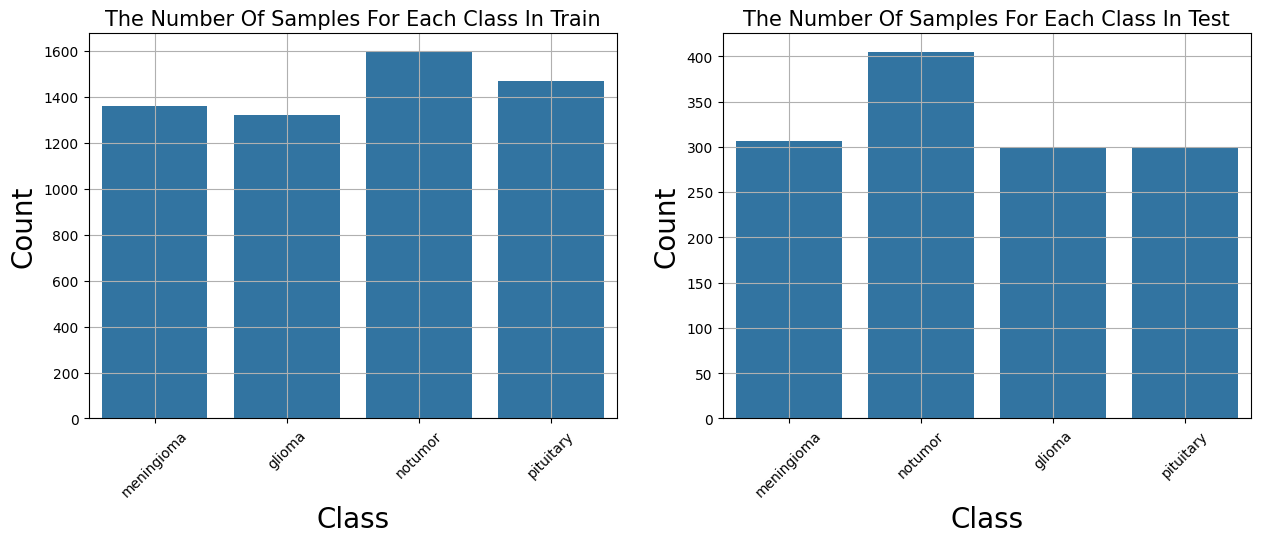

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=train_df.label)
plt.xlabel("Class",fontsize=20)
plt.title("The Number Of Samples For Each Class In Train",fontsize=15)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.countplot(x=test_df.label)
plt.xlabel("Class",fontsize=20)
plt.title("The Number Of Samples For Each Class In Test",fontsize=15)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


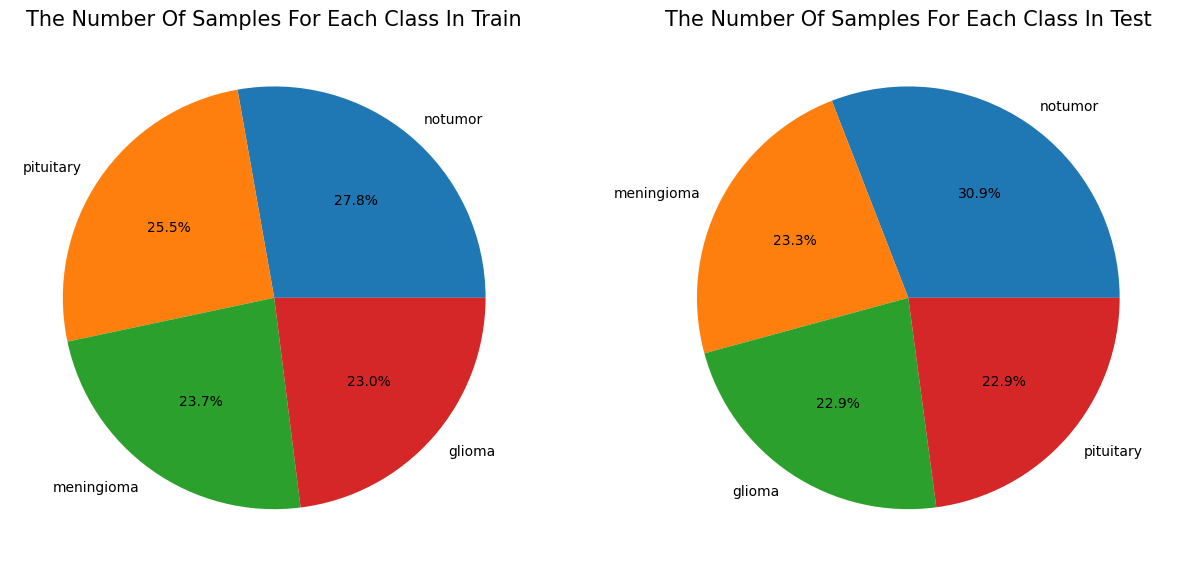

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.pie(train_df.label.value_counts(),labels=train_df.label.value_counts().index,autopct ='%1.1f%%')
plt.title("The Number Of Samples For Each Class In Train",fontsize=15)
plt.subplot(1,2,2)
plt.pie(test_df.label.value_counts(),labels=test_df.label.value_counts().index,autopct ='%1.1f%%')
plt.title("The Number Of Samples For Each Class In Test",fontsize=15)
plt.show()

In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Training'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing'

In [ ]:
for dirpath, dirnames, filenames in os.walk(train_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 0 images in '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Training'.
There are 0 directories and 1359 images in '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Training/meningioma'.
There are 0 directories and 1321 images in '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Training/glioma'.
There are 0 directories and 1595 images in '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Training/notumor'.
There are 0 directories and 1467 images in '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Training/pituitary'.


In [ ]:
for dirpath, dirnames, filenames in os.walk(test_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 0 images in '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing'.
There are 0 directories and 306 images in '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing/meningioma'.
There are 0 directories and 405 images in '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing/notumor'.
There are 0 directories and 300 images in '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing/glioma'.
There are 0 directories and 300 images in '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing/pituitary'.


In [ ]:
EPOCHS = 50
from math import floor
N_FOLDS = 5
INIT_LR = 1e-3
T_BS = 16
V_BS = 16
decay_rate = 0.95
decay_step = 1
IMAGE_SIZE = [224,224]

In [ ]:
import tensorflow_addons as tfa

def augment_image(image, label):
    # Apply augmentation transformations
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    image = tf.image.random_hue(image, max_delta=0.1)

    # Apply the width and height shifts
    width_shift = tf.random.uniform([], -0.2, 0.2) * tf.cast(tf.shape(image)[1], tf.float32)
    height_shift = tf.random.uniform([], -0.2, 0.2) * tf.cast(tf.shape(image)[0], tf.float32)
    image = tfa.image.translate(image, [width_shift, height_shift])

    return image, label

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 batch_size=32,
                                                                 image_size=IMAGE_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMAGE_SIZE,
                                                                shuffle=False)

Found 5742 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [ ]:
class_names =train_data.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

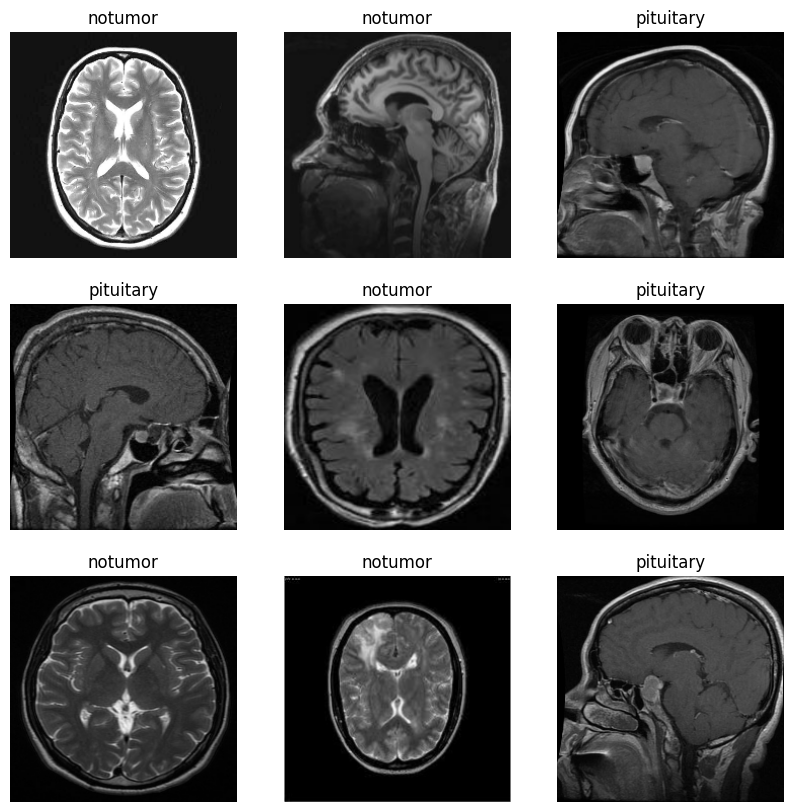

In [ ]:
import matplotlib.pyplot as plt

# Extract a batch of images and labels from the train_data dataset
for images, labels in train_data.take(1):
    # Display the first 9 images from the batch
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])  # Assuming class_names is a list containing the class names
        plt.axis("off")
    plt.show()


In [ ]:
# Apply augmentation to the training dataset using the map function
# train_dataset_augmented = train_data.map(augment_image)
def preprocess_image(image, label):
    image = tf.image.resize(image, IMAGE_SIZE)
    return image, label

train_dataset_preprocessed = train_data.map(preprocess_image)
train_dataset_augmented = train_dataset_preprocessed.map(augment_image)


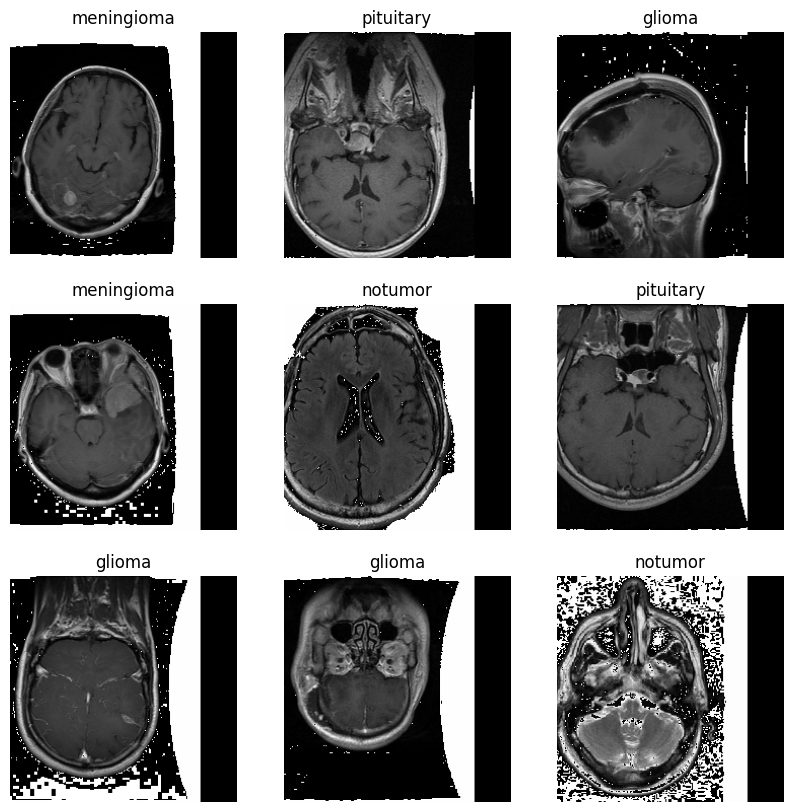

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot augmented images
def plot_augmented_images(dataset, num_samples=5):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Take one batch of augmented images
        for i in range(num_samples):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[tf.argmax(labels[i])])  # Assuming class_names is defined
            plt.axis("off")
    plt.show()

# Plot some augmented images
plot_augmented_images(train_dataset_augmented, num_samples=9)

In [ ]:
from tensorflow.keras.layers import Lambda
import tensorflow as tf
def Combined_model():
    # Input layer
    input_layer = Input(shape=(224, 224, 3))

    # Base VGG19 model as a feature extractor
    baseModel = VGG19(weights=None, include_top=False, input_tensor=input_layer)

    # Load the weights from the local file (specify the path)
    baseModel.load_weights('/content/drive/MyDrive/Weights/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5')

    # Freeze the layers of the VGG19 model
    for layer in baseModel.layers:
        layer.trainable = False

    x = baseModel.output



    # LSTM layer
    x = Reshape((49, 512))(x)
    x = LSTM(512, activation="relu", return_sequences=True, trainable=False)(x)
    x = BatchNormalization()(x)

    # FC layer
    x = Flatten(name="flatten")(x)

    # fc1 layer
    x = Dense(units=4096, activation='relu')(x)
    x = BatchNormalization()(x)

    # fc2 layer
    x = Dense(units=4096, activation='relu')(x)
    x = BatchNormalization()(x)

    # Output layer
    output = Dense(units=4, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output)
    opt = Adam(lr=1e3)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

    return model

# Create the model
model = Combined_model()

# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

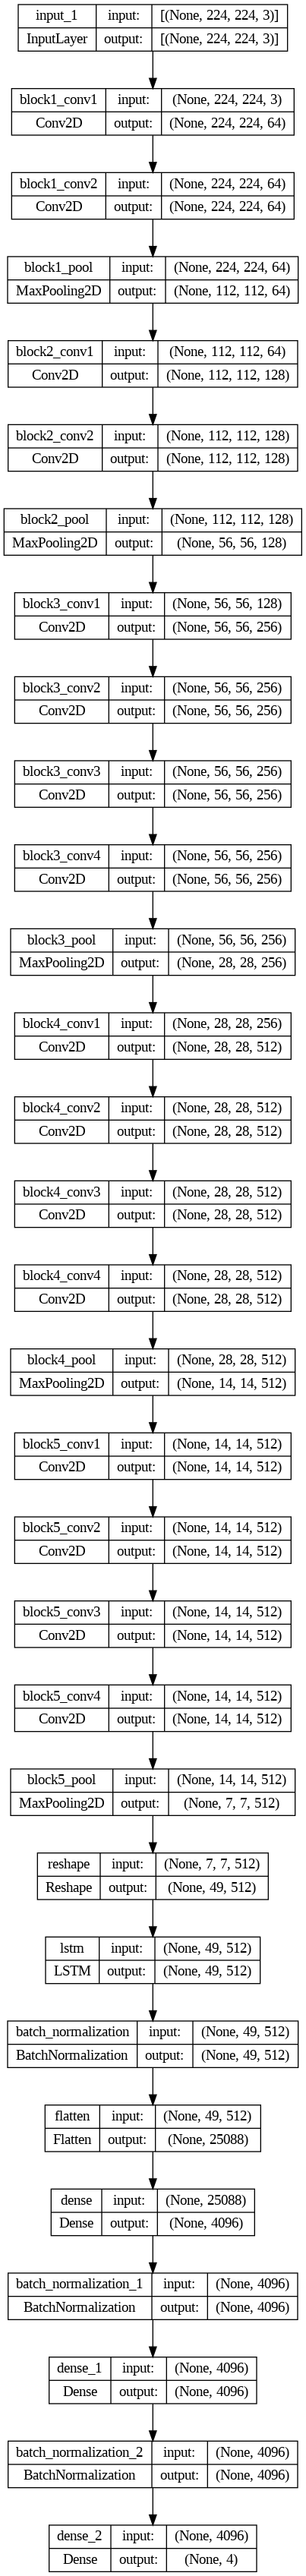

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model
plot_model(model, to_file='combined_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
checkpoint = [ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy',mode='max',verbose=1,save_best_only=True,save_weights_only=True),
             LearningRateScheduler(lambda epoch : INIT_LR * pow(decay_rate, floor(epoch / decay_step)))]
earlystop = EarlyStopping(monitor='accuracy', min_delta=0, patience=15, verbose=1, mode='max')

In [ ]:
history = model.fit(train_dataset_augmented,
                    epochs=50,
                    steps_per_epoch=len(train_dataset_augmented),
                    validation_data = test_data,
                    callbacks=[checkpoint])

Epoch 1/50
179/179 [==============================] - ETA: 0s - loss: 1.2156 - accuracy: 0.7719
Epoch 1: val_accuracy improved from -inf to 0.82227, saving model to best_model.h5
179/179 [==============================] - 1938s 11s/step - loss: 1.2156 - accuracy: 0.7719 - val_loss: 0.7520 - val_accuracy: 0.8223 - lr: 0.0010
Epoch 2/50
179/179 [==============================] - ETA: 0s - loss: 0.4510 - accuracy: 0.8480
Epoch 2: val_accuracy improved from 0.82227 to 0.82990, saving model to best_model.h5
179/179 [==============================] - 59s 326ms/step - loss: 0.4510 - accuracy: 0.8480 - val_loss: 0.6498 - val_accuracy: 0.8299 - lr: 9.5000e-04
Epoch 3/50
179/179 [==============================] - ETA: 0s - loss: 0.3762 - accuracy: 0.8766
Epoch 3: val_accuracy improved from 0.82990 to 0.86728, saving model to best_model.h5
179/179 [==============================] - 61s 334ms/step - loss: 0.3762 - accuracy: 0.8766 - val_loss: 0.4298 - val_accuracy: 0.8673 - lr: 9.0250e-04
Epoch 4/

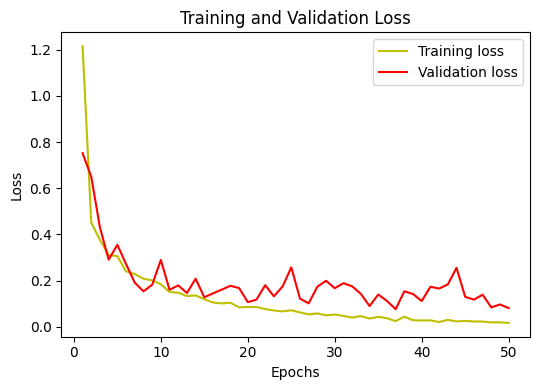

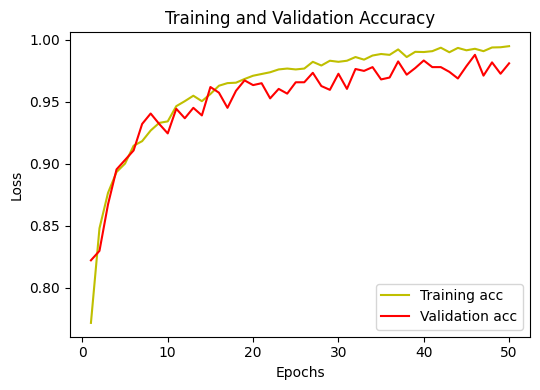

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(5.5, 4))

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.legend(fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(False)

plt.tight_layout()
plt.show()

loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(5.5, 4))

plt.plot(epochs, loss, 'y', label='Training acc')
plt.plot(epochs, val_loss, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy', fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.legend(fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(False)

plt.tight_layout()
plt.show()

In [ ]:

_, accuracy = model.evaluate(test_data)
print(f"Validation accuracy: {round(accuracy * 100, 2)}%")

41/41 [==============================] - 7s 173ms/step - loss: 0.0810 - accuracy: 0.9809
Validation accuracy: 98.09%


In [ ]:
pred_probs = model.predict(test_data, verbose=1)

41/41 [==============================] - 7s 176ms/step


In [ ]:
pred_classes = pred_probs.argmax(axis=1)

y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

In [ ]:
target_names = ['Glioma', 'Meningioma', 'No Tumor','Pituitary']
print(classification_report(y_labels,
                            pred_classes,
                            target_names=target_names, digits=2))

              precision    recall  f1-score   support

      Glioma       1.00      0.94      0.97       300
  Meningioma       0.94      0.99      0.96       306
    No Tumor       1.00      1.00      1.00       405
   Pituitary       0.99      0.99      0.99       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



In [ ]:
cm = confusion_matrix(y_labels,pred_classes)

TP = cm[0, 0]
TN = cm[1:, 1:].sum()
FP = cm[0, 1:].sum()
FN = cm[1:, 0].sum()

Population = TN+FN+TP+FP
spesificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)

print("True Positives:", TP)
print("False Positives:", FP)
print("True Negatives:", TN)
print("False Negatives:", FN)
print("Specificity:", spesificity)
print("Sensitivity:", sensitivity)

True Positives: 281
False Positives: 19
True Negatives: 1010
False Negatives: 1
Specificity: 0.9815354713313897
Sensitivity: 0.9964539007092199


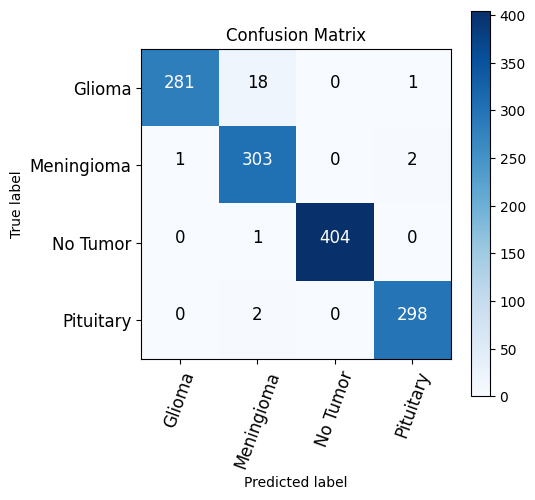

In [ ]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(20, 20), text_size=15, norm=False, savefig=False):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.grid(False)

  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)


make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=target_names,
                      figsize=(5, 5),
                      text_size=12,
                      norm=False,
                      savefig=True)

In [ ]:
model.save("model.h5")

**This one is working 3no**


1/1 [==============================] - 0s 352ms/step
Original Confidence: 0.7804
Grad-CAM Confidence: 1.0000


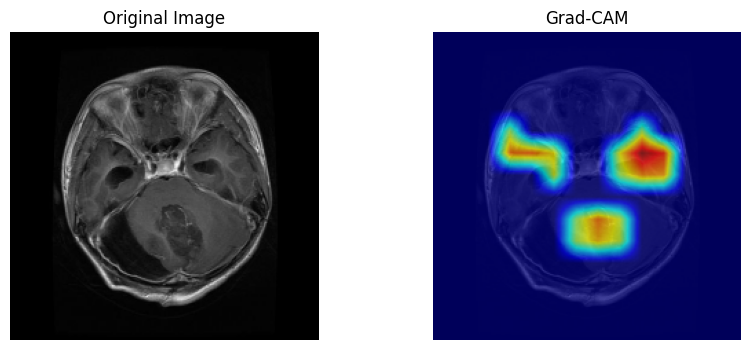

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input

# Load and preprocess the image
def load_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Model expects a batch of images
    return preprocess_input(img_array)  # Preprocess the image

# Generate the Grad-CAM heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


# Function to get the model's prediction confidence
def get_model_confidence(model, img_array):
    preds = model.predict(img_array)
    confidence = np.max(preds)
    return confidence, preds


# Overlay the heatmap on the original image
def superimpose_image(heatmap, original_img, intensity=0.5, colormap=cv2.COLORMAP_JET, threshold=0.5):
    # Normalize the heatmap
    heatmap_normalized = np.maximum(heatmap, 0) / np.max(heatmap)

    # Apply a threshold to the heatmap
    heatmap_thresholded = np.where(heatmap_normalized >= threshold, heatmap_normalized, 0)

    # Resize the heatmap to match the original image size
    heatmap_resized = cv2.resize(heatmap_thresholded, (original_img.shape[1], original_img.shape[0]))

    # Convert the heatmap to RGB
    heatmap_resized = np.uint8(255 * heatmap_resized)
    heatmap_colored = cv2.applyColorMap(heatmap_resized, colormap)

    # Blend the heatmap with the original image using the intensity factor
    superimposed_img = cv2.addWeighted(original_img, 1 - intensity, heatmap_colored, intensity, 0)

    return superimposed_img

# Path to your MRI image
#image_path = '/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-pi_0016.jpg'  # Replace with your actual image path
# image_path ='/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/Te-me_0010.jpg'
image_path='/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing/glioma/Te-glTr_0000.jpg'
preprocessed_img_array = load_preprocess_image(image_path)
original_img = cv2.imread(image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
original_img = cv2.resize(original_img, (224, 224))



# Get the model's confidence for the original image
original_confidence, _ = get_model_confidence(model, preprocessed_img_array)

# Generate heatmap
heatmap = make_gradcam_heatmap(preprocessed_img_array, model, 'block5_conv4')  # Replace with your actual last conv layer name

# Superimpose and visualize
superimposed_img = superimpose_image(heatmap, original_img, intensity=0.7, threshold=0.5)  # Adjust intensity and threshold as needed

# # Display the image
# plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()
# Get the model's confidence for the superimposed image
superimposed_img_array = np.expand_dims(superimposed_img, axis=0)  # Add batch dimension
superimposed_confidence, _ = get_model_confidence(model, superimposed_img_array)


# Print the confidence scores
print(f"Original Confidence: {original_confidence:.4f}")
print(f"Grad-CAM Confidence: {superimposed_confidence:.4f}")

# Display the original and superimposed images side by side
plt.figure(figsize=(10, 4))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display the Grad-CAM superimposed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title('Grad-CAM')
plt.axis('off')

plt.show()


1/1 [==============================] - 0s 51ms/step
Original Confidence: 0.7804
Confidence with Grad-CAM: 0.9530


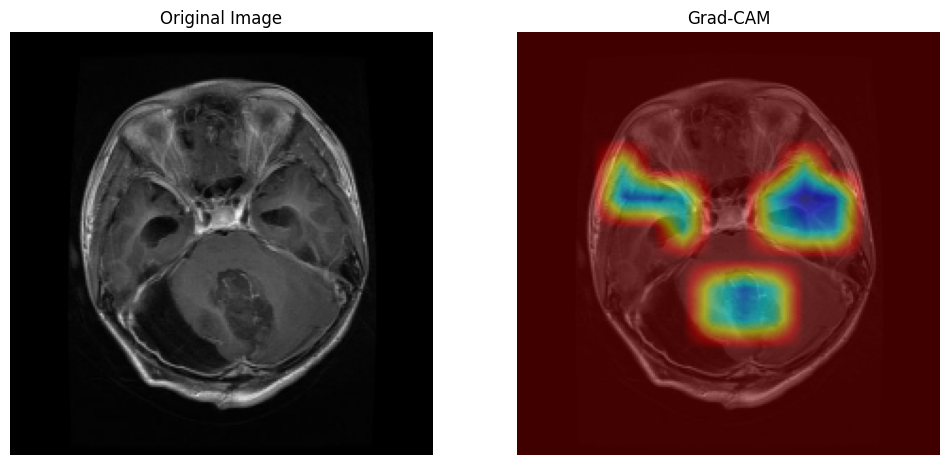

In [ ]:
def preprocess_image_array(img_array):
    # Ensure img_array is a mutable NumPy array
    img_array = np.array(img_array)

    # Resize the image and ensure adding batch dimension doesn't make it read-only
    img_array_resized = tf.image.resize(img_array, (224, 224)).numpy()  # Convert to NumPy array to ensure mutability

    # Add batch dimension
    img_array_resized = np.expand_dims(img_array_resized, axis=0)

    # Preprocess the image
    img_array_preprocessed = preprocess_input(img_array_resized)  # This should now work without the read-only error

    return img_array_preprocessed


def get_model_confidence(model, img_array):
    preds = model.predict(img_array)
    confidence = np.max(preds)
    return confidence


def evaluate_gradcam_impact(model, image_path, last_conv_layer_name):
    # Load and preprocess the image
    img_array = load_preprocess_image(image_path)
    original_img = cv2.imread(image_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    original_img = cv2.resize(original_img, (224, 224))

    # Get model confidence on the original image
    original_confidence = get_model_confidence(model, img_array)

    # Generate Grad-CAM heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Apply the heatmap as a mask to create a superimposed image
    superimposed_img = superimpose_image(heatmap, original_img, intensity=0.5,colormap=cv2.COLORMAP_JET, threshold=0.5)

    # Preprocess the superimposed image for model prediction
    superimposed_img_preprocessed = preprocess_image_array(superimposed_img)

    # Re-evaluate model confidence with the superimposed image
    masked_confidence = get_model_confidence(model, superimposed_img_preprocessed)

    # Compare confidences
    print(f"Original Confidence: {original_confidence:.4f}")
    print(f"Confidence with Grad-CAM: {masked_confidence:.4f}")

    # Visualize the original and superimposed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img)
    plt.title('Grad-CAM')
    plt.axis('off')
    plt.show()


evaluate_gradcam_impact(model, '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing/glioma/Te-glTr_0000.jpg', 'block5_conv4')


1/1 [==============================] - 0s 42ms/step
Original Confidence: 0.6515
Grad-CAM Confidence: 0.9998


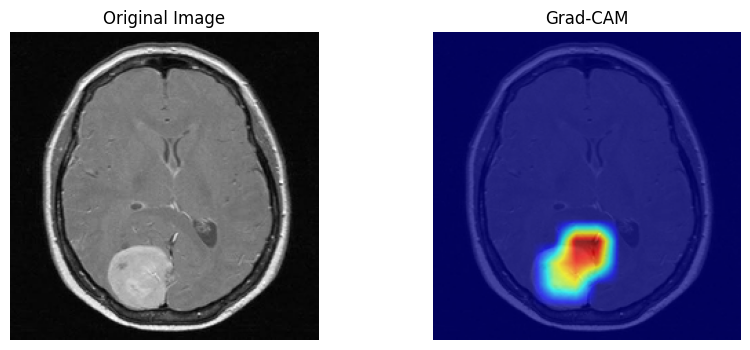

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input

# Load and preprocess the image
def load_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Model expects a batch of images
    return preprocess_input(img_array)  # Preprocess the image

# Generate the Grad-CAM heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


# Function to get the model's prediction confidence
def get_model_confidence(model, img_array):
    preds = model.predict(img_array)
    confidence = np.max(preds)
    return confidence, preds


# Overlay the heatmap on the original image
def superimpose_image(heatmap, original_img, intensity=0.5, colormap=cv2.COLORMAP_JET, threshold=0.5):
    # Normalize the heatmap
    heatmap_normalized = np.maximum(heatmap, 0) / np.max(heatmap)

    # Apply a threshold to the heatmap
    heatmap_thresholded = np.where(heatmap_normalized >= threshold, heatmap_normalized, 0)

    # Resize the heatmap to match the original image size
    heatmap_resized = cv2.resize(heatmap_thresholded, (original_img.shape[1], original_img.shape[0]))

    # Convert the heatmap to RGB
    heatmap_resized = np.uint8(255 * heatmap_resized)
    heatmap_colored = cv2.applyColorMap(heatmap_resized, colormap)

    # Blend the heatmap with the original image using the intensity factor
    superimposed_img = cv2.addWeighted(original_img, 1 - intensity, heatmap_colored, intensity, 0)

    return superimposed_img

# Path to your MRI image
#image_path = '/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-pi_0016.jpg'  # Replace with your actual image path
# image_path ='/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/Te-me_0010.jpg'
image_path='/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing/meningioma/Te-me_0010.jpg'
preprocessed_img_array = load_preprocess_image(image_path)
original_img = cv2.imread(image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
original_img = cv2.resize(original_img, (224, 224))



# Get the model's confidence for the original image
original_confidence, _ = get_model_confidence(model, preprocessed_img_array)

# Generate heatmap
heatmap = make_gradcam_heatmap(preprocessed_img_array, model, 'block5_conv4')  # Replace with your actual last conv layer name

# Superimpose and visualize
superimposed_img = superimpose_image(heatmap, original_img, intensity=0.7, threshold=0.5)  # Adjust intensity and threshold as needed

# # Display the image
# plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()
# Get the model's confidence for the superimposed image
superimposed_img_array = np.expand_dims(superimposed_img, axis=0)  # Add batch dimension
superimposed_confidence, _ = get_model_confidence(model, superimposed_img_array)


# Print the confidence scores
print(f"Original Confidence: {original_confidence:.4f}")
print(f"Grad-CAM Confidence: {superimposed_confidence:.4f}")

# Display the original and superimposed images side by side
plt.figure(figsize=(10, 4))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display the Grad-CAM superimposed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title('Grad-CAM')
plt.axis('off')

plt.show()


1/1 [==============================] - 0s 74ms/step
Original Confidence: 0.6515
Confidence with Grad-CAM: 0.5877


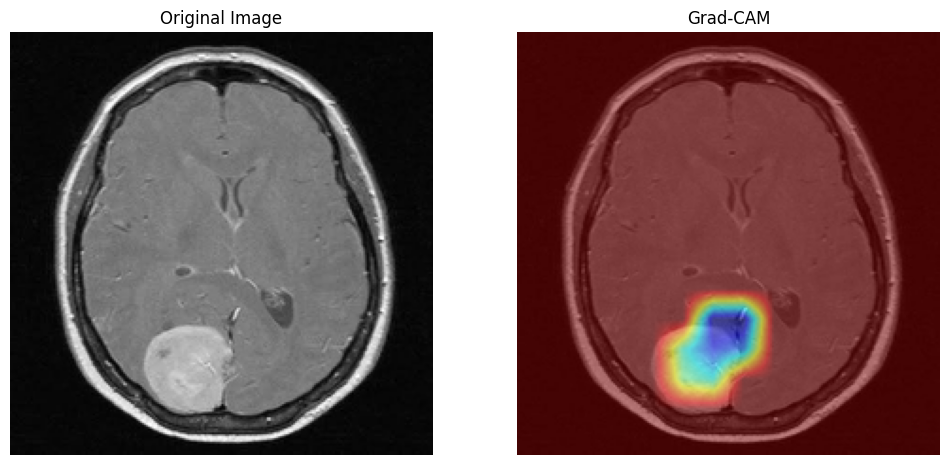

In [ ]:
def preprocess_image_array(img_array):
    # Ensure img_array is a mutable NumPy array
    img_array = np.array(img_array)

    # Resize the image and ensure adding batch dimension doesn't make it read-only
    img_array_resized = tf.image.resize(img_array, (224, 224)).numpy()  # Convert to NumPy array to ensure mutability

    # Add batch dimension
    img_array_resized = np.expand_dims(img_array_resized, axis=0)

    # Preprocess the image
    img_array_preprocessed = preprocess_input(img_array_resized)  # This should now work without the read-only error

    return img_array_preprocessed


def get_model_confidence(model, img_array):
    preds = model.predict(img_array)
    confidence = np.max(preds)
    return confidence


def evaluate_gradcam_impact(model, image_path, last_conv_layer_name):
    # Load and preprocess the image
    img_array = load_preprocess_image(image_path)
    original_img = cv2.imread(image_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    original_img = cv2.resize(original_img, (224, 224))

    # Get model confidence on the original image
    original_confidence = get_model_confidence(model, img_array)

    # Generate Grad-CAM heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Apply the heatmap as a mask to create a superimposed image
    superimposed_img = superimpose_image(heatmap, original_img, intensity=0.5,colormap=cv2.COLORMAP_JET, threshold=0.5)

    # Preprocess the superimposed image for model prediction
    superimposed_img_preprocessed = preprocess_image_array(superimposed_img)

    # Re-evaluate model confidence with the superimposed image
    masked_confidence = get_model_confidence(model, superimposed_img_preprocessed)

    # Compare confidences
    print(f"Original Confidence: {original_confidence:.4f}")
    print(f"Confidence with Grad-CAM: {masked_confidence:.4f}")

    # Visualize the original and superimposed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img)
    plt.title('Grad-CAM')
    plt.axis('off')
    plt.show()


evaluate_gradcam_impact(model, '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing/meningioma/Te-me_0010.jpg', 'block5_conv4')


1/1 [==============================] - 0s 43ms/step
Original Confidence: 1.0000
Grad-CAM Confidence: 0.9992


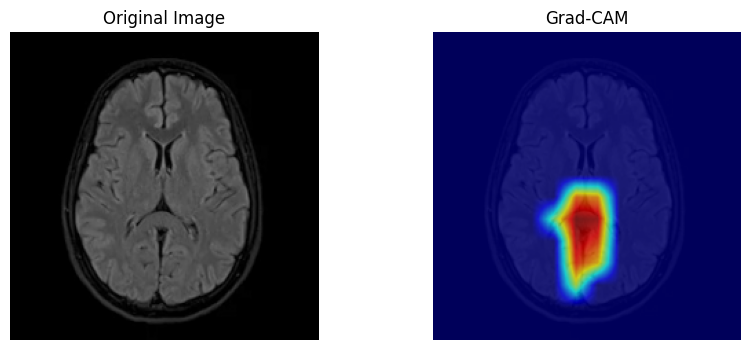

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input

# Load and preprocess the image
def load_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Model expects a batch of images
    return preprocess_input(img_array)  # Preprocess the image

# Generate the Grad-CAM heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


# Function to get the model's prediction confidence
def get_model_confidence(model, img_array):
    preds = model.predict(img_array)
    confidence = np.max(preds)
    return confidence, preds


# Overlay the heatmap on the original image
def superimpose_image(heatmap, original_img, intensity=0.5, colormap=cv2.COLORMAP_JET, threshold=0.5):
    # Normalize the heatmap
    heatmap_normalized = np.maximum(heatmap, 0) / np.max(heatmap)

    # Apply a threshold to the heatmap
    heatmap_thresholded = np.where(heatmap_normalized >= threshold, heatmap_normalized, 0)

    # Resize the heatmap to match the original image size
    heatmap_resized = cv2.resize(heatmap_thresholded, (original_img.shape[1], original_img.shape[0]))

    # Convert the heatmap to RGB
    heatmap_resized = np.uint8(255 * heatmap_resized)
    heatmap_colored = cv2.applyColorMap(heatmap_resized, colormap)

    # Blend the heatmap with the original image using the intensity factor
    superimposed_img = cv2.addWeighted(original_img, 1 - intensity, heatmap_colored, intensity, 0)

    return superimposed_img

# Path to your MRI image
#image_path = '/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-pi_0016.jpg'  # Replace with your actual image path
# image_path ='/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/Te-me_0010.jpg'
image_path='/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing/notumor/Te-noTr_0002.jpg'
preprocessed_img_array = load_preprocess_image(image_path)
original_img = cv2.imread(image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
original_img = cv2.resize(original_img, (224, 224))



# Get the model's confidence for the original image
original_confidence, _ = get_model_confidence(model, preprocessed_img_array)

# Generate heatmap
heatmap = make_gradcam_heatmap(preprocessed_img_array, model, 'block5_conv4')  # Replace with your actual last conv layer name

# Superimpose and visualize
superimposed_img = superimpose_image(heatmap, original_img, intensity=0.7, threshold=0.5)  # Adjust intensity and threshold as needed

# # Display the image
# plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()
# Get the model's confidence for the superimposed image
superimposed_img_array = np.expand_dims(superimposed_img, axis=0)  # Add batch dimension
superimposed_confidence, _ = get_model_confidence(model, superimposed_img_array)


# Print the confidence scores
print(f"Original Confidence: {original_confidence:.4f}")
print(f"Grad-CAM Confidence: {superimposed_confidence:.4f}")

# Display the original and superimposed images side by side
plt.figure(figsize=(10, 4))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display the Grad-CAM superimposed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title('Grad-CAM')
plt.axis('off')

plt.show()


1/1 [==============================] - 0s 46ms/step
Original Confidence: 1.0000
Confidence with Grad-CAM: 0.9952


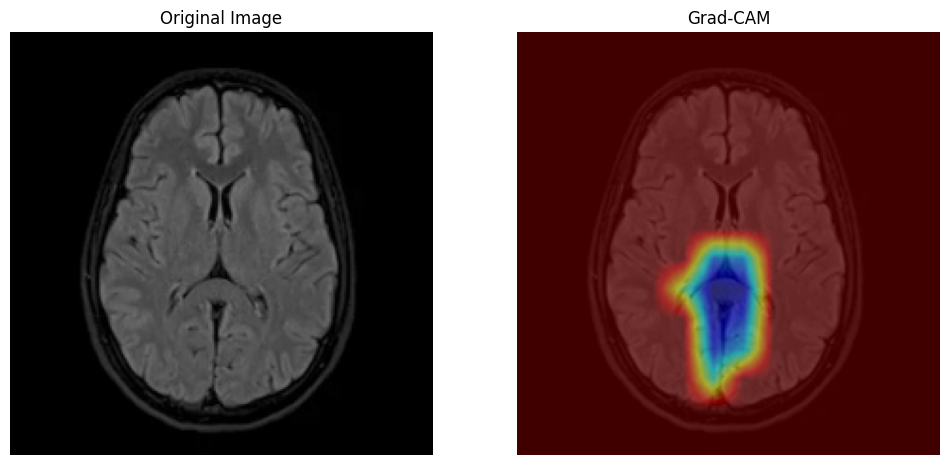

In [ ]:
def preprocess_image_array(img_array):
    # Ensure img_array is a mutable NumPy array
    img_array = np.array(img_array)

    # Resize the image and ensure adding batch dimension doesn't make it read-only
    img_array_resized = tf.image.resize(img_array, (224, 224)).numpy()  # Convert to NumPy array to ensure mutability

    # Add batch dimension
    img_array_resized = np.expand_dims(img_array_resized, axis=0)

    # Preprocess the image
    img_array_preprocessed = preprocess_input(img_array_resized)  # This should now work without the read-only error

    return img_array_preprocessed


def get_model_confidence(model, img_array):
    preds = model.predict(img_array)
    confidence = np.max(preds)
    return confidence


def evaluate_gradcam_impact(model, image_path, last_conv_layer_name):
    # Load and preprocess the image
    img_array = load_preprocess_image(image_path)
    original_img = cv2.imread(image_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    original_img = cv2.resize(original_img, (224, 224))

    # Get model confidence on the original image
    original_confidence = get_model_confidence(model, img_array)

    # Generate Grad-CAM heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Apply the heatmap as a mask to create a superimposed image
    superimposed_img = superimpose_image(heatmap, original_img, intensity=0.5,colormap=cv2.COLORMAP_JET, threshold=0.5)

    # Preprocess the superimposed image for model prediction
    superimposed_img_preprocessed = preprocess_image_array(superimposed_img)

    # Re-evaluate model confidence with the superimposed image
    masked_confidence = get_model_confidence(model, superimposed_img_preprocessed)

    # Compare confidences
    print(f"Original Confidence: {original_confidence:.4f}")
    print(f"Confidence with Grad-CAM: {masked_confidence:.4f}")

    # Visualize the original and superimposed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img)
    plt.title('Grad-CAM')
    plt.axis('off')
    plt.show()


evaluate_gradcam_impact(model, '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing/notumor/Te-noTr_0002.jpg', 'block5_conv4')


1/1 [==============================] - 0s 48ms/step
Original Confidence: 0.9966
Grad-CAM Confidence: 1.0000


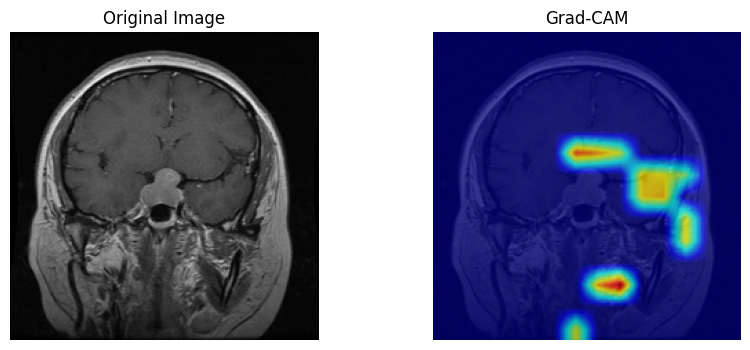

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input

# Load and preprocess the image
def load_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Model expects a batch of images
    return preprocess_input(img_array)  # Preprocess the image

# Generate the Grad-CAM heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


# Function to get the model's prediction confidence
def get_model_confidence(model, img_array):
    preds = model.predict(img_array)
    confidence = np.max(preds)
    return confidence, preds


# Overlay the heatmap on the original image
def superimpose_image(heatmap, original_img, intensity=0.5, colormap=cv2.COLORMAP_JET, threshold=0.5):
    # Normalize the heatmap
    heatmap_normalized = np.maximum(heatmap, 0) / np.max(heatmap)

    # Apply a threshold to the heatmap
    heatmap_thresholded = np.where(heatmap_normalized >= threshold, heatmap_normalized, 0)

    # Resize the heatmap to match the original image size
    heatmap_resized = cv2.resize(heatmap_thresholded, (original_img.shape[1], original_img.shape[0]))

    # Convert the heatmap to RGB
    heatmap_resized = np.uint8(255 * heatmap_resized)
    heatmap_colored = cv2.applyColorMap(heatmap_resized, colormap)

    # Blend the heatmap with the original image using the intensity factor
    superimposed_img = cv2.addWeighted(original_img, 1 - intensity, heatmap_colored, intensity, 0)

    return superimposed_img

# Path to your MRI image
#image_path = '/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-pi_0016.jpg'  # Replace with your actual image path
# image_path ='/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/Te-me_0010.jpg'
image_path='/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing/pituitary/Te-piTr_0001.jpg'
preprocessed_img_array = load_preprocess_image(image_path)
original_img = cv2.imread(image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
original_img = cv2.resize(original_img, (224, 224))



# Get the model's confidence for the original image
original_confidence, _ = get_model_confidence(model, preprocessed_img_array)

# Generate heatmap
heatmap = make_gradcam_heatmap(preprocessed_img_array, model, 'block5_conv4')  # Replace with your actual last conv layer name

# Superimpose and visualize
superimposed_img = superimpose_image(heatmap, original_img, intensity=0.7, threshold=0.5)  # Adjust intensity and threshold as needed

# # Display the image
# plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()
# Get the model's confidence for the superimposed image
superimposed_img_array = np.expand_dims(superimposed_img, axis=0)  # Add batch dimension
superimposed_confidence, _ = get_model_confidence(model, superimposed_img_array)


# Print the confidence scores
print(f"Original Confidence: {original_confidence:.4f}")
print(f"Grad-CAM Confidence: {superimposed_confidence:.4f}")

# Display the original and superimposed images side by side
plt.figure(figsize=(10, 4))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display the Grad-CAM superimposed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title('Grad-CAM')
plt.axis('off')

plt.show()


1/1 [==============================] - 0s 51ms/step
Original Confidence: 0.9966
Confidence with Grad-CAM: 0.9690


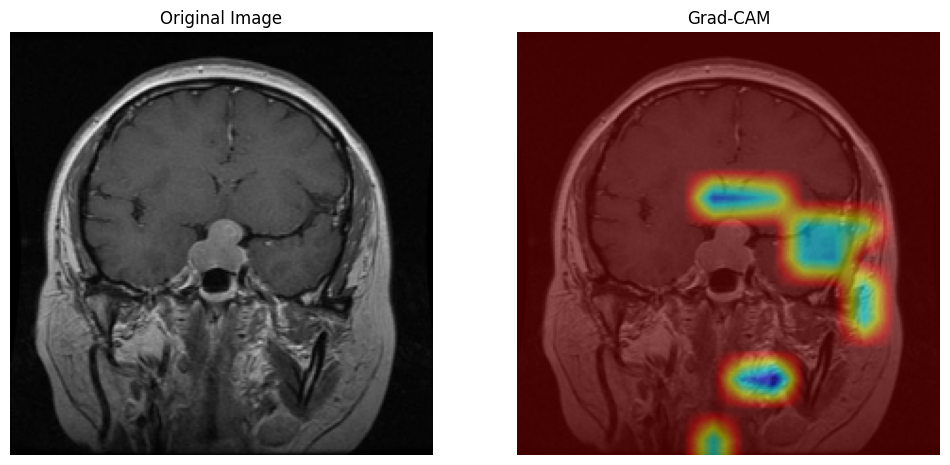

In [ ]:
def preprocess_image_array(img_array):
    # Ensure img_array is a mutable NumPy array
    img_array = np.array(img_array)

    # Resize the image and ensure adding batch dimension doesn't make it read-only
    img_array_resized = tf.image.resize(img_array, (224, 224)).numpy()  # Convert to NumPy array to ensure mutability

    # Add batch dimension
    img_array_resized = np.expand_dims(img_array_resized, axis=0)

    # Preprocess the image
    img_array_preprocessed = preprocess_input(img_array_resized)  # This should now work without the read-only error

    return img_array_preprocessed


def get_model_confidence(model, img_array):
    preds = model.predict(img_array)
    confidence = np.max(preds)
    return confidence


def evaluate_gradcam_impact(model, image_path, last_conv_layer_name):
    # Load and preprocess the image
    img_array = load_preprocess_image(image_path)
    original_img = cv2.imread(image_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    original_img = cv2.resize(original_img, (224, 224))

    # Get model confidence on the original image
    original_confidence = get_model_confidence(model, img_array)

    # Generate Grad-CAM heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Apply the heatmap as a mask to create a superimposed image
    superimposed_img = superimpose_image(heatmap, original_img, intensity=0.5,colormap=cv2.COLORMAP_JET, threshold=0.5)

    # Preprocess the superimposed image for model prediction
    superimposed_img_preprocessed = preprocess_image_array(superimposed_img)

    # Re-evaluate model confidence with the superimposed image
    masked_confidence = get_model_confidence(model, superimposed_img_preprocessed)

    # Compare confidences
    print(f"Original Confidence: {original_confidence:.4f}")
    print(f"Confidence with Grad-CAM: {masked_confidence:.4f}")

    # Visualize the original and superimposed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img)
    plt.title('Grad-CAM')
    plt.axis('off')
    plt.show()


evaluate_gradcam_impact(model, '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing/pituitary/Te-piTr_0001.jpg', 'block5_conv4')


In [ ]:
#The Grad-CAM algorithm
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = tf.keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = tf.keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = tf.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap

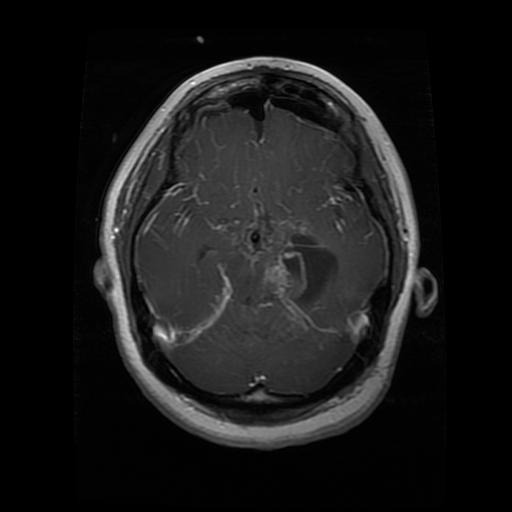

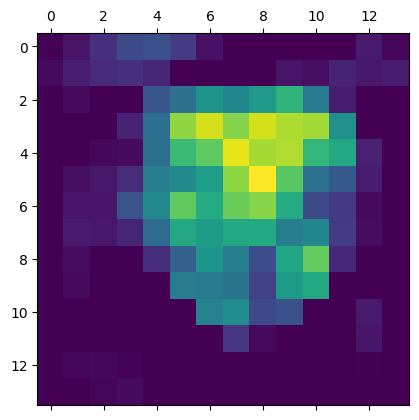

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import tensorflow as tf

img_size = (224,224)
last_conv_layer_name = "block5_conv4"

# The local path to our target image
img_path = '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing/glioma/Te-gl_0031.jpg'
display(Image(img_path))

# The Grad-CAM algorithm
def get_img_array(img_path, size):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    array = tf.keras.utils.img_to_array(img)
    array = tf.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap

# Prepare image
img_array = get_img_array(img_path, size=img_size)


# Remove last layer's softmax
model.layers[-1].activation = None

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


1/1 [==============================] - 0s 25ms/step
Original predicted class: 0 with confidence: 99.99%


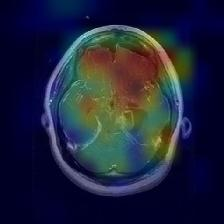

1/1 [==============================] - 0s 25ms/step
Confidence with Grad-CAM superimposed: 99.95%


In [ ]:
import numpy as np
import tensorflow as tf
from matplotlib import cm
from PIL import Image
from scipy.special import softmax

def save_and_display_gradcam(img_path, heatmap, model, cam_path="cam.jpg", alpha=0.4):
    # Load the original image with the correct target size
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
    img = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img, axis=0)  # Prepare image for model

    # Predict on the original image to get logits and calculate original confidence
    logits = model.predict([img_array])  # Model input adjusted for two inputs
    probs = softmax(logits[0])
    original_confidence = np.max(probs)
    original_class = np.argmax(probs)

    print(f"Original predicted class: {original_class} with confidence: {original_confidence*100:.2f}%")

    # Apply heatmap to original image
    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM and the superimposed image
    display(Image.open(cam_path))

    # Re-evaluate model confidence with the superimposed image
    superimposed_img_array = np.expand_dims(tf.keras.utils.img_to_array(superimposed_img), axis=0)
    superimposed_logits = model.predict([superimposed_img_array])  # Adjusted for two inputs
    superimposed_probs = softmax(superimposed_logits[0])
    masked_confidence = np.max(superimposed_probs)
    masked_class = np.argmax(superimposed_probs)

    print(f"Confidence with Grad-CAM superimposed: {masked_confidence*100:.2f}%")
# Display the superimposed Grad CAM with model prediction confidence
save_and_display_gradcam(img_path, heatmap, model)

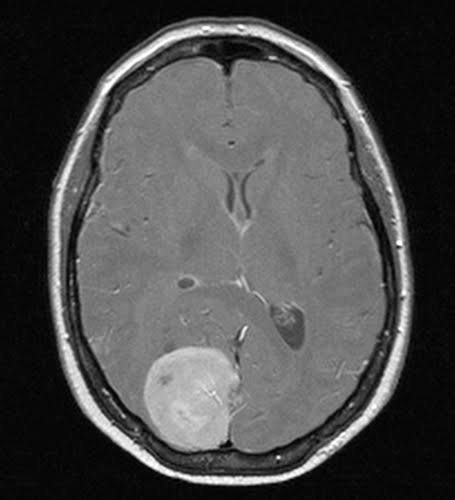

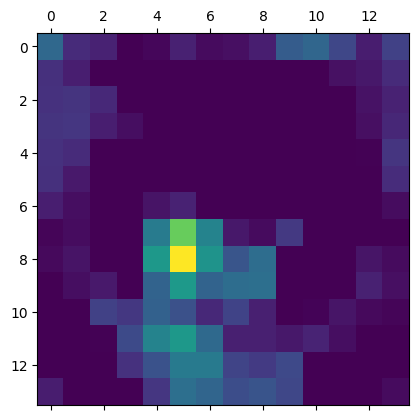

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import tensorflow as tf

img_size = (224,224)
last_conv_layer_name = "block5_conv4"

# The local path to our target image
img_path = '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing/meningioma/Te-me_0010.jpg'
display(Image(img_path))

# The Grad-CAM algorithm
def get_img_array(img_path, size):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    array = tf.keras.utils.img_to_array(img)
    array = tf.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap

# Prepare image
img_array = get_img_array(img_path, size=img_size)


# Remove last layer's softmax
model.layers[-1].activation = None

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


1/1 [==============================] - 0s 57ms/step
Original predicted class: 1 with confidence: 100.00%


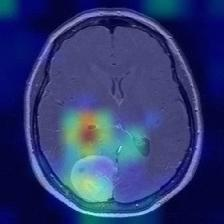

1/1 [==============================] - 0s 79ms/step
Confidence with Grad-CAM superimposed: 99.47%


In [ ]:
import numpy as np
import tensorflow as tf
from matplotlib import cm
from PIL import Image
from scipy.special import softmax

def save_and_display_gradcam(img_path, heatmap, model, cam_path="cam.jpg", alpha=0.7):
    # Load the original image with the correct target size
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
    img = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img, axis=0)  # Prepare image for model

    # Predict on the original image to get logits and calculate original confidence
    logits = model.predict([img_array])  # Model input adjusted for two inputs
    probs = softmax(logits[0])
    original_confidence = np.max(probs)
    original_class = np.argmax(probs)

    print(f"Original predicted class: {original_class} with confidence: {original_confidence*100:.2f}%")

    # Apply heatmap to original image
    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM and the superimposed image
    display(Image.open(cam_path))

    # Re-evaluate model confidence with the superimposed image
    superimposed_img_array = np.expand_dims(tf.keras.utils.img_to_array(superimposed_img), axis=0)
    superimposed_logits = model.predict([superimposed_img_array])  # Adjusted for two inputs
    superimposed_probs = softmax(superimposed_logits[0])
    masked_confidence = np.max(superimposed_probs)
    masked_class = np.argmax(superimposed_probs)

    print(f"Confidence with Grad-CAM superimposed: {masked_confidence*100:.2f}%")
# Display the superimposed Grad CAM with model prediction confidence
save_and_display_gradcam(img_path, heatmap, model)

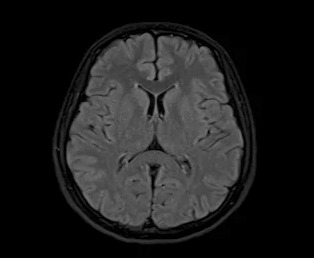

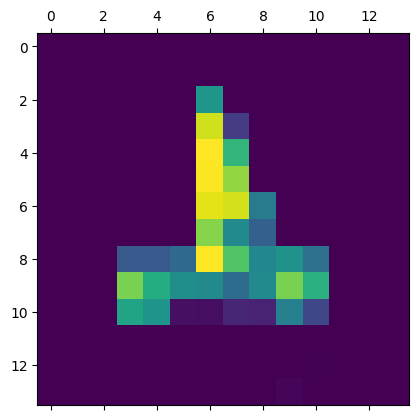

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import tensorflow as tf

img_size = (224,224)
last_conv_layer_name = "block5_conv4"

# The local path to our target image
img_path = '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing/notumor/Te-noTr_0002.jpg'
display(Image(img_path))

# The Grad-CAM algorithm
def get_img_array(img_path, size):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    array = tf.keras.utils.img_to_array(img)
    array = tf.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap

# Prepare image
img_array = get_img_array(img_path, size=img_size)


# Remove last layer's softmax
model.layers[-1].activation = None

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


1/1 [==============================] - 0s 45ms/step
Original predicted class: 2 with confidence: 100.00%


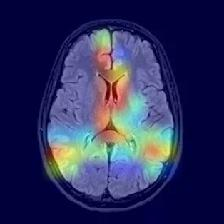

1/1 [==============================] - 0s 44ms/step
Confidence with Grad-CAM superimposed: 100.00%


In [ ]:
import numpy as np
import tensorflow as tf
from matplotlib import cm
from PIL import Image
from scipy.special import softmax

def save_and_display_gradcam(img_path, heatmap, model, cam_path="cam.jpg", alpha=0.4):
    # Load the original image with the correct target size
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
    img = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img, axis=0)  # Prepare image for model

    # Predict on the original image to get logits and calculate original confidence
    logits = model.predict([img_array])  # Model input adjusted for two inputs
    probs = softmax(logits[0])
    original_confidence = np.max(probs)
    original_class = np.argmax(probs)

    print(f"Original predicted class: {original_class} with confidence: {original_confidence*100:.2f}%")

    # Apply heatmap to original image
    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM and the superimposed image
    display(Image.open(cam_path))

    # Re-evaluate model confidence with the superimposed image
    superimposed_img_array = np.expand_dims(tf.keras.utils.img_to_array(superimposed_img), axis=0)
    superimposed_logits = model.predict([superimposed_img_array])  # Adjusted for two inputs
    superimposed_probs = softmax(superimposed_logits[0])
    masked_confidence = np.max(superimposed_probs)
    masked_class = np.argmax(superimposed_probs)

    print(f"Confidence with Grad-CAM superimposed: {masked_confidence*100:.2f}%")
# Display the superimposed Grad CAM with model prediction confidence
save_and_display_gradcam(img_path, heatmap, model)

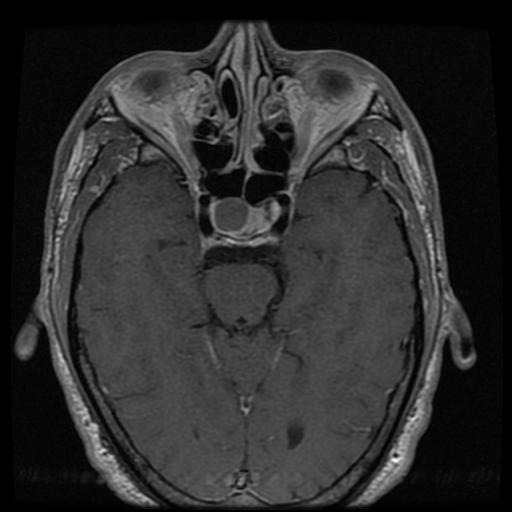

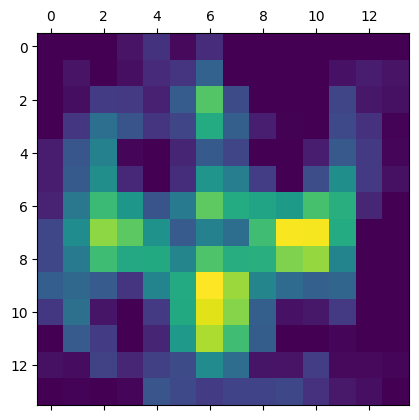

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import tensorflow as tf

img_size = (224,224)
last_conv_layer_name = "block5_conv4"

# The local path to our target image
img_path = '/content/drive/MyDrive/Colab Notebooks/Tumor7k/Testing/pituitary/Te-pi_0030.jpg'
display(Image(img_path))

# The Grad-CAM algorithm
def get_img_array(img_path, size):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    array = tf.keras.utils.img_to_array(img)
    array = tf.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap

# Prepare image
img_array = get_img_array(img_path, size=img_size)


# Remove last layer's softmax
model.layers[-1].activation = None

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


1/1 [==============================] - 0s 26ms/step
Original predicted class: 3 with confidence: 99.99%


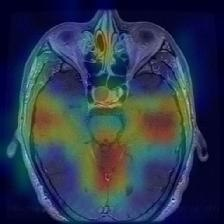

1/1 [==============================] - 0s 46ms/step
Confidence with Grad-CAM superimposed: 99.95%


In [ ]:
import numpy as np
import tensorflow as tf
from matplotlib import cm
from PIL import Image
from scipy.special import softmax

def save_and_display_gradcam(img_path, heatmap, model, cam_path="cam.jpg", alpha=0.4):
    # Load the original image with the correct target size
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
    img = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img, axis=0)  # Prepare image for model

    # Predict on the original image to get logits and calculate original confidence
    logits = model.predict([img_array])  # Model input adjusted for two inputs
    probs = softmax(logits[0])
    original_confidence = np.max(probs)
    original_class = np.argmax(probs)

    print(f"Original predicted class: {original_class} with confidence: {original_confidence*100:.2f}%")

    # Apply heatmap to original image
    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM and the superimposed image
    display(Image.open(cam_path))

    # Re-evaluate model confidence with the superimposed image
    superimposed_img_array = np.expand_dims(tf.keras.utils.img_to_array(superimposed_img), axis=0)
    superimposed_logits = model.predict([superimposed_img_array])  # Adjusted for two inputs
    superimposed_probs = softmax(superimposed_logits[0])
    masked_confidence = np.max(superimposed_probs)
    masked_class = np.argmax(superimposed_probs)

    print(f"Confidence with Grad-CAM superimposed: {masked_confidence*100:.2f}%")
# Display the superimposed Grad CAM with model prediction confidence
save_and_display_gradcam(img_path, heatmap, model)